In [1]:
#import packages

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots

import tensorflow as tf
from tensorflow.keras.layers import Dropout
from sklearn import datasets
from tensorflow import keras
from keras import metrics
from sklearn.metrics import confusion_matrix

In [2]:

training_data = pd.read_json('/content/train.json')
test_data = pd.read_json('/content/test.json')



# Dataset is now stored in a Pandas Dataframe

In [3]:
training_data.columns

Index(['giver_username_if_known',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_id', 'request_number_of_comments_at_retrieval', 'request_text',
       'request_text_edit_aware', 'request_title',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request', 'r

In [6]:
test_data.columns

Index(['giver_username_if_known', 'request_id', 'request_text_edit_aware',
       'request_title', 'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 'requester_username',
       'unix_timestamp_of_request', 'unix_timestamp_of_request_utc'],
      dtype='object')

In [4]:
# isolate variables...
X_train = np.array(training_data.drop('requester_received_pizza', axis = 1))
print(X_train.shape)

# ...from labels
Y_train = np.array(training_data['requester_received_pizza'])
print(Y_train.shape)

(4040, 31)
(4040,)


In [5]:
X_training_data_post = training_data['request_text_edit_aware']


In [6]:
max_sequence_length = 30 # how much of the post to look at

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=None, # Maximum vocabulary size - None -> no cap
    standardize='lower_and_strip_punctuation', # Standarization to apply to text - None -> no standarization
    split="whitespace", # Values can be None (no splitting), "whitespace", or a Callable
    output_mode='int',  # Values can be "int", "multi_hot", "count" or "tf_idf"
    output_sequence_length=max_sequence_length, # Only valid in INT mode. If set, the output will have its time dimension padded or truncated to exactly output_sequence_length values
    )

vectorize_layer.adapt(X_training_data_post)



In [7]:
X_training_data_post_vectorized = vectorize_layer(X_training_data_post)

In [8]:
X_train_one_hot = tf.keras.utils.to_categorical(X_training_data_post_vectorized)
print('X_train_one_hot shape:', X_train_one_hot.shape)

X_train_one_hot shape: (4040, 30, 13208)


In [9]:
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

In [10]:
def build_onehot_model3(average_over_positions=False):
  """Build a tf.keras model for one-hot data."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation="sigmoid"         # sigmoid activation for classification
  ))

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])

  return model

In [11]:
model5 = build_onehot_model3(average_over_positions=False)

Epoch 1/15
57/57 [==============================] - 5s 80ms/step - loss: 0.5739 - binary_accuracy: 0.7486 - val_loss: 0.5644 - val_binary_accuracy: 0.7401
Epoch 2/15
57/57 [==============================] - 6s 104ms/step - loss: 0.3133 - binary_accuracy: 0.8837 - val_loss: 0.5704 - val_binary_accuracy: 0.7277
Epoch 3/15
57/57 [==============================] - 4s 62ms/step - loss: 0.1978 - binary_accuracy: 0.9758 - val_loss: 0.5769 - val_binary_accuracy: 0.7302
Epoch 4/15
57/57 [==============================] - 3s 49ms/step - loss: 0.1384 - binary_accuracy: 0.9860 - val_loss: 0.5837 - val_binary_accuracy: 0.7252
Epoch 5/15
57/57 [==============================] - 4s 63ms/step - loss: 0.1053 - binary_accuracy: 0.9890 - val_loss: 0.5965 - val_binary_accuracy: 0.7252
Epoch 6/15
57/57 [==============================] - 3s 47ms/step - loss: 0.0842 - binary_accuracy: 0.9912 - val_loss: 0.6038 - val_binary_accuracy: 0.7302
Epoch 7/15
57/57 [==============================] - 3s 47ms/step - lo

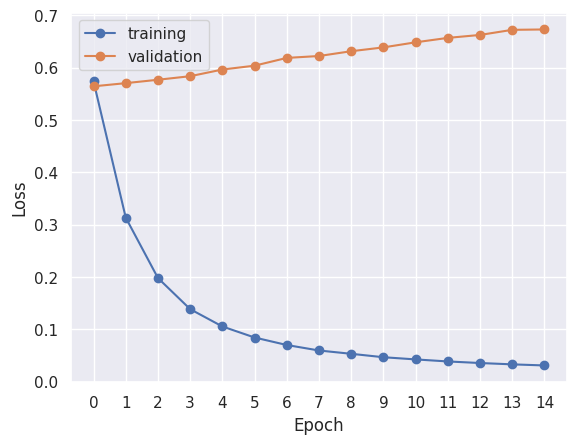

In [12]:


# Fit the model.
history5 = model5.fit(
  x = X_train_one_hot,  # one-hot training data
  y = Y_train,          # corresponding binary labels
  epochs=15,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

# Convert the return value into a DataFrame so we can see the train loss
# and binary accuracy after every epoch.
history5 = pd.DataFrame(history5.history)
plot_history(history5)

In [ ]:
type(X_train_one_hot)

In [ ]:
test_data.dtypes

In [ ]:
X_test_data_post = test_data['request_text_edit_aware']

In [ ]:

vectorize_layer.adapt(X_test_data_post)

In [ ]:
X_test_data_post_vectorized = vectorize_layer(X_test_data_post)

In [ ]:
X_test_one_hot = tf.keras.utils.to_categorical(X_test_data_post_vectorized)
print('X_test_one_hot:', X_test_one_hot.shape)

In [ ]:
type(X_test_one_hot)

In [ ]:
type(X_train_one_hot)

In [ ]:
#model5.predict(X_test_one_hot)


In [ ]:
num_sequences = X_test_one_hot.shape[0]
sequence_length = 30
num_features = 8043

X_test_one_hot_reshaped = X_test_one_hot.reshape(num_sequences, sequence_length, num_features)

In [ ]:
#from keras_preprocessing.sequence import pad_sequences

In [ ]:
#model5.predict(X_test_one_hot_reshaped)

In [ ]:
print(X_test_one_hot_reshaped.shape)

In [ ]:
num_sequences

In [ ]:
X_test_one_hot_flat = X_test_one_hot.flatten()

pad_width = 154950
constant_value = 0

X_test_one_hot_flat_padded = np.pad(X_test_one_hot_flat, (pad_width, pad_width), mode='constant', constant_values=constant_value)



In [ ]:
predictions = model5.predict(X_test_one_hot_flat_padded)

In [ ]:
predictions2 = model5.predict(X_train_one_hot)

In [ ]:
confusion_matrix(Y_train, )